In [0]:
############################################ IMPORTING LIBRARIES #####################################################
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
############################################ LOADING DATASET #######################################################
# Load the fashion-mnist pre-shuffled train data and test data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
############################################ PREPROCESS DATASET #####################################################
x_train = x_train / 255.0
x_test = x_test / 255.0

print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))
#Splitting data
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (60000, 28, 28) y_train shape: (60000,)
Number of train data - 60000
Number of test data - 10000
x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## **Without Using Any Overfitting techniques**

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Using TensorFlow backend.


Epoch: 0, Train Loss: 2.7128307819366455, Train Accuracy: 10.012727230787277, Validation Loss: 2.4350829124450684, Validation Accuracy: 19.699999690055847
Epoch: 1, Train Loss: 2.4387624263763428, Train Accuracy: 18.518181145191193, Validation Loss: 2.2733428478240967, Validation Accuracy: 17.720000445842743
Epoch: 2, Train Loss: 2.2736315727233887, Train Accuracy: 18.12909096479416, Validation Loss: 2.2085695266723633, Validation Accuracy: 32.82000124454498
Epoch: 3, Train Loss: 2.2072832584381104, Train Accuracy: 33.18181931972504, Validation Loss: 2.1991987228393555, Validation Accuracy: 34.49999988079071
Epoch: 4, Train Loss: 2.1974942684173584, Train Accuracy: 34.07999873161316, Validation Loss: 2.1981170177459717, Validation Accuracy: 22.40000069141388
Epoch: 5, Train Loss: 2.1963508129119873, Train Accuracy: 22.576363384723663, Validation Loss: 2.1704819202423096, Validation Accuracy: 11.680000275373459
Epoch: 6, Train Loss: 2.1687819957733154, Train Accuracy: 11.96909099817276,

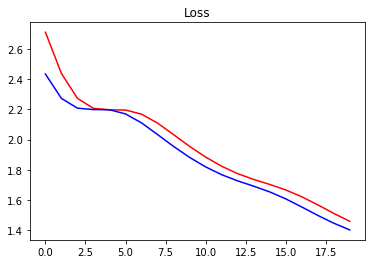

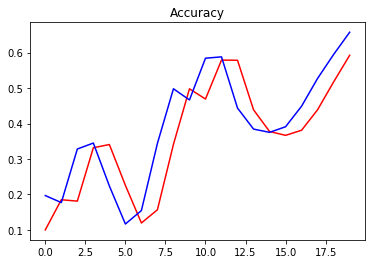

In [0]:
from keras.optimizers import Adam
from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras.metrics import categorical_accuracy,sparse_categorical_accuracy
from keras.initializers import glorot_uniform, zero
########################################## DEFINING HYPERPARAMETERS ###################################################
#to store all loss and accuracy values computedin for loop
losses_train = []
accuracies_train=[]
losses_val = []
accuracies_val=[]
#defining input shape,classes to classify 
input_dim = 28*28
output_dim = 10
#placegolder for the inputs
x = K.placeholder(name="x", shape=(None, input_dim))
ytrue = K.placeholder(name="y", shape=(None, output_dim))
#layers filters
hidden_dim = 512
hidden_dim1 = 200
########################################## BUILDING MODEL ###################################################
#intializing randon weigths for layers using glorot_uniform()
W1 = K.variable(glorot_uniform()([input_dim, hidden_dim]))
b1 = K.variable(zero()((hidden_dim,)))
W3 = K.variable(glorot_uniform()([hidden_dim, hidden_dim1]))
b3 = K.variable(zero()((hidden_dim1,)))
W2 = K.variable(glorot_uniform()([hidden_dim1, output_dim]))
b2 = K.variable(zero()((output_dim,)))
params = [W1, b1, W3, b3, W2, b2]

#building layers of the model
hidden = K.sigmoid(K.dot(x, W1)+b1)
hidden1 = K.sigmoid(K.dot(hidden, W3)+b3)
ypred = K.softmax(K.dot(hidden1, W2)+b2,axis=-1)

########################################## DEFINING LOSS, ACCURACY ###################################################
#using categorical crossentropy
loss = K.mean(K.categorical_crossentropy(ytrue, ypred),axis=None)
accuracy =K.mean(categorical_accuracy(ytrue, ypred))
#defining optimizer
opt = Adam()
#update the weights
updates = opt.get_updates(params, [], loss, )
#Defining training the model
train = K.function([x, ytrue],[loss, accuracy],updates=updates)
#Defining evaluation of the model
test = K.function([x, ytrue], [loss, accuracy])

########################################## GET DATASET ###################################################
((xtrain, ytrain),(xtest, ytest)) = fashion_mnist.load_data()
#normalizing the data
(xtrain, xtest) = [x.reshape((-1, input_dim))/255.0 for x in (xtrain, xtest)]
(ytrain, ytest) = [to_categorical(y, output_dim) for y in (ytrain, ytest)]
#spliting the training data further into validation and training dataset
(xtrain, xvalid) = xtrain[5000:], xtrain[:5000] 
(ytrain, yvalid) = ytrain[5000:], ytrain[:5000]

########################################## TRAINING MODEL ########################################################
for epoch in range(20):
  loss, accuracy = train([xtrain, ytrain])
  
  #appending losses and accuracies for plotting for training and validation dataset
  losses_train.append(loss)
  accuracies_train.append(accuracy)
  #evaluating validation dataset
  val_loss, val_accuracy = test([xvalid, yvalid])
  losses_val.append(val_loss)
  accuracies_val.append(val_accuracy)
  
  print("Epoch: {}, Train Loss: {}, Train Accuracy: {}, Validation Loss: {}, Validation Accuracy: {}".format(
		epoch, loss, accuracy*100, val_loss, val_accuracy* 100))

#evaluating testing dataset
test_loss, test_accuracy = test([xtest, ytest])
print("Testing Loss: {}, Testing Accuracy: {}".format(test_loss, test_accuracy*100))

######################################## PLOTTING LOSS, ACCURACY ###################################################
import matplotlib.pyplot as plt
#plotting loss and accuracy of training and validation dataset
#red is training , blue is validation
plt.plot(losses_train,'r')
plt.plot(losses_val,'b')
plt.title('Loss')
plt.show()

plt.plot(accuracies_train,'r')
plt.plot(accuracies_val,'b')
plt.title('Accuracy')
plt.show()

## **Preventing Overfitting**

Epoch: 0, Train Loss: 0.8920808434486389, Train Accuracy: 66.68727397918701, Validation Loss: 0.8871799111366272, Validation Accuracy: 66.96000099182129
Epoch: 1, Train Loss: 0.6792958974838257, Train Accuracy: 74.3327260017395, Validation Loss: 0.6638607978820801, Validation Accuracy: 75.6600022315979
Epoch: 2, Train Loss: 0.6065709590911865, Train Accuracy: 77.50181555747986, Validation Loss: 0.5892038345336914, Validation Accuracy: 78.65999937057495
Epoch: 3, Train Loss: 0.5633514523506165, Train Accuracy: 79.50727343559265, Validation Loss: 0.5535672903060913, Validation Accuracy: 80.5400013923645
Epoch: 4, Train Loss: 0.5348414182662964, Train Accuracy: 80.59272766113281, Validation Loss: 0.5286345481872559, Validation Accuracy: 81.22000098228455
Epoch: 5, Train Loss: 0.5080346465110779, Train Accuracy: 81.7618191242218, Validation Loss: 0.4946831166744232, Validation Accuracy: 82.70000219345093
Epoch: 6, Train Loss: 0.4976321756839752, Train Accuracy: 81.98000192642212, Validatio

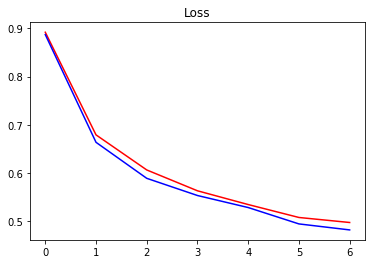

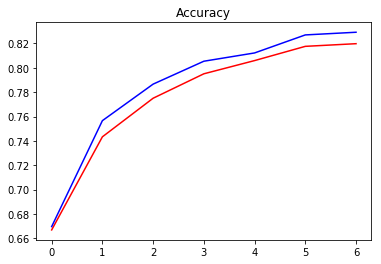

In [0]:
############################################ IMPORTING LIBRARIES #####################################################
import tensorflow as tf
from keras.optimizers import Adam
from keras import backend as K
from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical
from keras.metrics import categorical_accuracy,sparse_categorical_accuracy
from keras.initializers import glorot_uniform, zero
import sys

# shuffle_batch() shuffle the examples in a batch before training
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch
        
#appending loss and accuracies calculated in for loop
losses_train = []
accuracies_train=[]
losses_val = []
accuracies_val=[]
#input shape
input_dim = 28*28
#output classes for multi classification
output_dim = 10
#placeholder for the inputs
x = K.placeholder(name="x", shape=(None, input_dim))
ytrue = K.placeholder(name="y", shape=(None, output_dim))
############################################ BUILDING MODEL #####################################################
#layers filters
hidden_dim = 512
hidden_dim1 = 200
#defining weights with random initital values using glorot_uniform()
W1 = K.variable(glorot_uniform()([input_dim, hidden_dim]))
b1 = K.variable(zero()((hidden_dim,)))
W3 = K.variable(glorot_uniform()([hidden_dim, hidden_dim1]))
b3 = K.variable(zero()((hidden_dim1,)))
W2 = K.variable(glorot_uniform()([hidden_dim1, output_dim]))
b2 = K.variable(zero()((output_dim,)))
params = [W1, b1, W3, b3, W2, b2]

#building model using dropout for improving the model
hidden = K.sigmoid(K.dot(x, W1)+b1)
dropout1=K.dropout(hidden, 0.3)
hidden1 = K.sigmoid(K.dot(hidden, W3)+b3)
dropout2=K.dropout(hidden1, 0.3)
ypred = K.softmax(K.dot(dropout2, W2)+b2,axis=-1)
#defining loss and accuracy 
#using categorical crossentropy as this is multi classification
loss = K.mean(K.categorical_crossentropy(ytrue, ypred),axis=None)
accuracy =K.mean(categorical_accuracy(ytrue, ypred))
#defining optimizer 
opt = Adam(lr=0.01, epsilon=0.2, decay=0.0)
#updating weights
updates = opt.get_updates(params, [], loss, )
#defining the training and evaluation of the model
train = K.function([x, ytrue],[loss, accuracy],updates=updates)
test = K.function([x, ytrue], [loss, accuracy])

############################################## GETTING DATASET ########################################################
((xtrain, ytrain),(xtest, ytest)) = fashion_mnist.load_data()
#normalizing data
(xtrain, xtest) = [x.reshape((-1, input_dim))/255.0 for x in (xtrain, xtest)]
(ytrain, ytest) = [to_categorical(y, output_dim) for y in (ytrain, ytest)]
#splitting training data further into training and validation dataset
(xtrain, xvalid) = xtrain[5000:], xtrain[:5000] 
(ytrain, yvalid) = ytrain[5000:], ytrain[:5000]
batch_size=32

############################################## TRAINING MODEL ########################################################
for epoch in range(7):
  #using mini batches by shuffling the training dataset
  for X_batch, y_batch in shuffle_batch(xtrain, ytrain, batch_size):
    loss, accuracy = train([X_batch, y_batch])
  
  #evaluating traing, validation loss and accuracy
  loss, accuracy=test([xtrain, ytrain])
  #appending loss and accuracy for later use in plotting
  losses_train.append(loss)
  accuracies_train.append(accuracy)
  val_loss, val_accuracy = test([xvalid, yvalid])
  losses_val.append(val_loss)
  accuracies_val.append(val_accuracy)
  
  print("Epoch: {}, Train Loss: {}, Train Accuracy: {}, Validation Loss: {}, Validation Accuracy: {}".format(
		epoch, loss, accuracy*100, val_loss, val_accuracy*100))
  
#evaluating testing dataset  
test_loss, test_accuracy = test([xtest, ytest])
print("Testing Loss: {}, Testing Accuracy: {}".format(test_loss, test_accuracy*100))

######################################### PLOTTING LOSS, ACCURACY ###################################################
import matplotlib.pyplot as plt
#plotting loss and accuracy for training and validation 
#red for training and blue for validation data
plt.plot(losses_train,'r')
plt.plot(losses_val,'b')
plt.title('Loss')
plt.show()

plt.plot(accuracies_train,'r')
plt.plot(accuracies_val,'b')
plt.title('Accuracy')
plt.show()